In [2]:
import pandas as pd
import string

import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt


def remove_punctuation_and_tonos(text):
    translator = str.maketrans("", "", string.punctuation + "΄«»")
    text = text.translate(translator)
    text = text.replace("ά", "α").replace("έ", "ε").replace("ή", "η").replace("ί", "ι").replace("ό", "ο").replace("ύ", "υ").replace("ώ", "ω")
    text = text.replace("Ά", "Α").replace("Έ", "Ε").replace("Ή", "Η").replace("Ί", "Ι").replace("Ό", "Ο").replace("Ύ", "Υ").replace("Ώ", "Ω")
    return text.lower()

# Read the CSV file
df = pd.read_csv("wiki.csv")

# Specify the column containing the sentences
sentences_column = 'Text'

# Convert the sentences to lowercase and remove punctuation and tonos
df[sentences_column] = df[sentences_column].apply(remove_punctuation_and_tonos)
df[sentences_column] = df[sentences_column].str.replace(r'\b(ο|η|ενος|΄|προς|πρωτη|πρωτο|ενας|μια||καθως|περιπου|δυο|ενα|εναν|«|»|μεχρι|α|β|οπως|μεταξυ|οταν|οποια|οποιος|οποιο|οπου|ως|το|του|στις|τους|μια|ενα|της|τη|τα|των|μια|ενα|στη|στην|και|στα|στο|στον|στους)\b', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()

# Save the preprocessed dataset to a new CSV file
df.to_csv("preprocessed_dataset.csv", index=False)



In [3]:
df = pd.read_csv("wiki.csv")

# Initialize counters for commas and periods in both categories
comma_count = {'simple': 0, 'complicated': 0}
period_count = {'simple': 0, 'complicated': 0}

# Iterate through the dataset and count commas and periods
for index, row in df.iterrows():
    sentence = row['Text']
    label = row['Output']
    
    comma_count[label] += sentence.count(',')
    period_count[label] += sentence.count('.')

# Print the results
print("Output (commas)")
for label, count in comma_count.items():
    print(f"{label.ljust(12)} {count}")

print("\nOutput (periods)")
for label, count in period_count.items():
    print(f"{label.ljust(12)} {count}")



Output (commas)
simple       1671
complicated  4433

Output (periods)
simple       1731
complicated  1394


In [4]:
# Read the preprocessed CSV file
df_preprocessed = pd.read_csv("preprocessed_dataset.csv")

# Display the preprocessed dataset
print(df_preprocessed)



           Output                                               Text
0          simple                  αποτσελεμι ειναι περιοχη ηρακλειο
1          simple              γεννηθηκε αγιο γεωργιο μεσσηνιας 1918
2          simple  παγκοσμια κοινα ειναι εκφραση που χρησιμοποιει...
3          simple  αντιληψη ελληνων ειναι οτι οι φοινικες ονομαστ...
4          simple  λεωφορος αθηνων χωριζει ορος απο ποικιλο λεγετ...
...           ...                                                ...
7540  complicated  βρισκεται βορειοανατολικες παρυφες κορυφης κοπ...
7541  complicated                 οι γονεις καταγονταν κι οι απ μανη
7542  complicated  ξεκινησε την καριερα ατλας κορυφαιας κατηγορια...
7543  complicated  ιδρυτικα μελη ηταν οι δρ τσαρλς ριτσαρντσον ιν...
7544  complicated  ελαβε αριστη εκπαιδευση απο τον πατερα χεραρντ...

[7545 rows x 2 columns]


In [5]:
# Specify the column containing the labels
label_column = 'Output'  # Replace with the actual column name

# Split the instances based on the label column
complicated_instances = df[df[label_column] == 'complicated']
simple_instances = df[df[label_column] == 'simple']



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Katerina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Katerina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


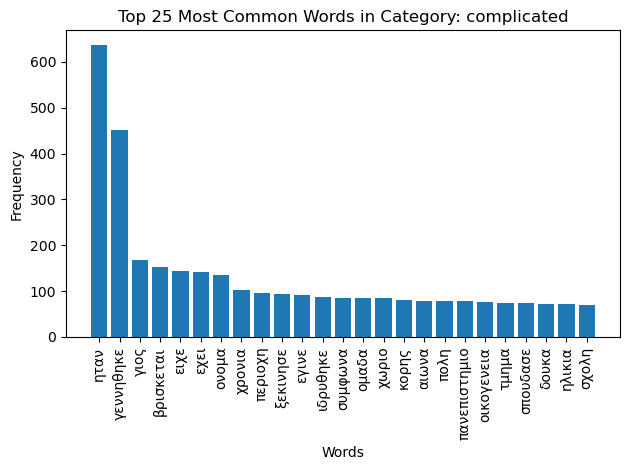

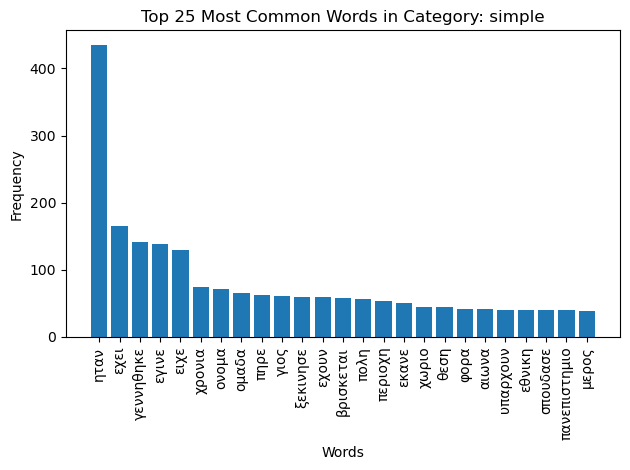

In [6]:
# Specify the column containing the Greek text data
text_column = 'Text'

# Specify the column containing the categories
category_column = 'Output'

# Convert the text column to strings
df_preprocessed[text_column] = df_preprocessed[text_column].astype(str)

# Combine all text into a single string
text = ' '.join(df_preprocessed[text_column])

# Tokenize the Greek text into individual words
nltk.download('punkt')
tokens = nltk.word_tokenize(text, language='greek')

# Filter out Greek stopwords (common words that often don't carry much meaning)
nltk.download('stopwords')
stop_words = set(stopwords.words('greek'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_tokens)

# Specify the 25 of top words to display
num_top_words = 25

# Group the DataFrame by category and find the most common words in each category
top_words_by_category = df_preprocessed.groupby(category_column)[text_column].apply(lambda x: ' '.join(x)).apply(lambda x: nltk.word_tokenize(x, language='greek')).apply(lambda x: [word for word in x if word.lower() not in stop_words]).apply(lambda x: Counter(x).most_common(num_top_words))

# Create a bar plot for each category
for category, top_words in top_words_by_category.items():
    words = [word[0] for word in top_words]
    frequencies = [word[1] for word in top_words]

    plt.figure()
    plt.bar(words, frequencies)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {num_top_words} Most Common Words in Category: {category}')
    plt.xticks(rotation=90)
    plt.tight_layout()

# Show the plots
plt.show()



In [7]:
sentences_column = 'Text'

# Convert the sentences to lowercase
df[sentences_column] = df[sentences_column].str.lower()

# Tokenize the sentences into individual words
nltk.download('punkt')
df['word_count'] = df[sentences_column].apply(lambda x: len(nltk.word_tokenize(x, language='greek')))

# Calculate the average word count
average_word_count = df['word_count'].mean()

# Print the average word count
print("Average Word Count:", average_word_count)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Katerina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average Word Count: 18.789264413518886


In [8]:
# Convert the sentences to lowercase
df[sentences_column] = df[sentences_column].str.lower()

# Tokenize the sentences into individual words
nltk.download('punkt')
df['word_count'] = df[sentences_column].apply(lambda x: len(nltk.word_tokenize(x, language='greek')))

# Calculate the average word count based on labels
average_word_count_by_label = df.groupby('Output')['word_count'].mean()

# Print the average word count based on labels
print("Average Word Count by Label:")
print(average_word_count_by_label)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Katerina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average Word Count by Label:
Output
complicated    22.359752
simple         14.706534
Name: word_count, dtype: float64


In [9]:
# Specify the column containing the sentences
sentences_column = 'Text'

# Tokenize the sentences into individual words
nltk.download('punkt')
df['tokens'] = df[sentences_column].apply(lambda x: nltk.word_tokenize(x, language='greek'))

# Flatten the tokens into a single list
all_tokens = [word for sentence_tokens in df['tokens'] for word in sentence_tokens]

# Calculate the vocabulary size
vocabulary_size = len(set(all_tokens))

# Print the vocabulary size
print("Vocabulary Size:", vocabulary_size)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Katerina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vocabulary Size: 25636


In [10]:
# Convert the sentences to lowercase
df[sentences_column] = df[sentences_column].str.lower()

# Calculate the length of each sentence
df['sentence_length'] = df[sentences_column].str.len()

# Calculate sentence length by label
sentence_length_by_label = df.groupby(label_column)['sentence_length'].mean()

# Print the sentence length by label
print("Mean Sentence Length by Label:")
print(sentence_length_by_label)


Mean Sentence Length by Label:
Output
complicated    132.921491
simple          87.213068
Name: sentence_length, dtype: float64


In [11]:

def mean_word_length(sentence):
    words = sentence.split()
    word_lengths = [len(word) for word in words]
    if len(word_lengths) > 0:
        return sum(word_lengths) / len(word_lengths)
    else:
        return 0

# Apply the mean_word_length function to each row of the DataFrame
df['mean_word_length'] = df['Text'].apply(mean_word_length)

# Calculate the mean word length and word count for each label
result = df.groupby('Output').agg({'mean_word_length': 'mean', 'Text': 'count'})

# Rename the 'sentences' column to 'word_count'
result = result.rename(columns={'Text': 'word_count'})

# Print the result
print("Mean word Length and Word Count by Label:")
print(result)


Mean word Length and Word Count by Label:
             mean_word_length  word_count
Output                                   
complicated          5.619596        4025
simple               5.559478        3520


In [24]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = sentence_length_by_label
data2 = average_word_count_by_label
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation between average word count and:sentence length %.3f' % corr)

Pearsons correlation between average word count and:sentence length 1.000


In [26]:

seed(1)
# prepare data
data1 = comma_count
data2 = period_count
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation between average word count and:sentence length %.3f' % corr)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed